# Task 3: Feature importance

In [3]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV, LinearRegression, Ridge
from scipy.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Load data

In [4]:
with open("./task3_feature-importance_data.pickle", "rb") as f:
    X, y = pickle.load(f)

## Some visualization on data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from scipy import stats


# Create a DataFrame from the dataset
df_tmp = pd.DataFrame(X)
df_tmp['y'] = y

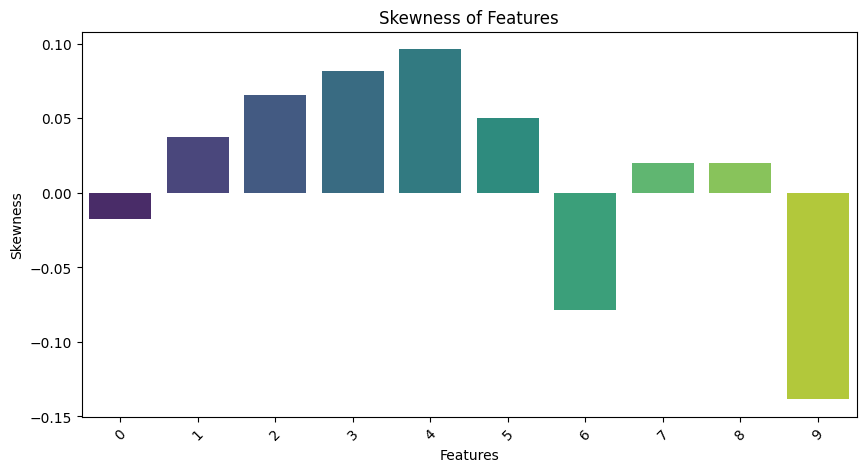

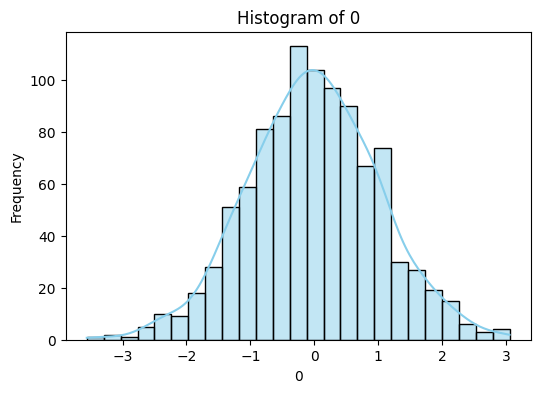

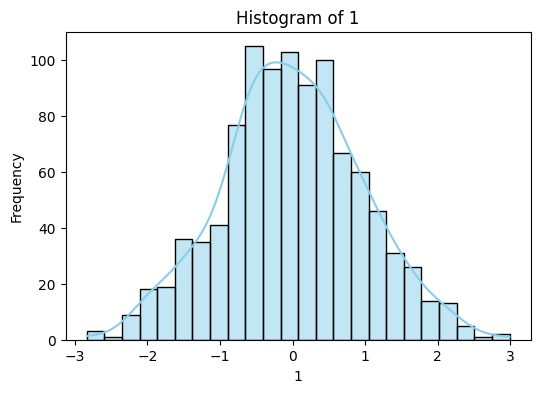

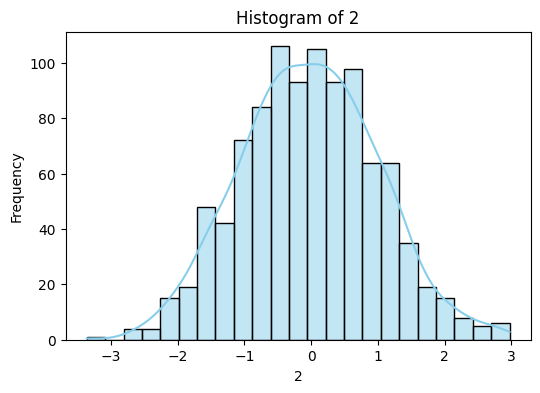

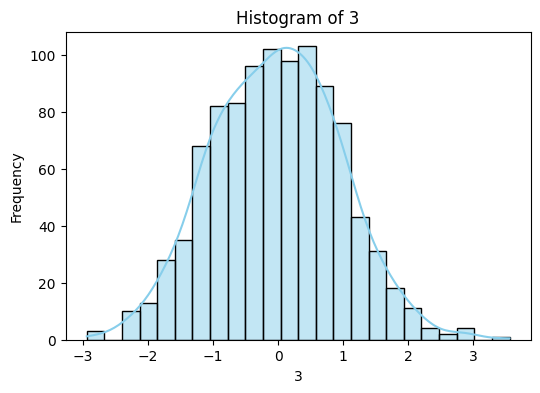

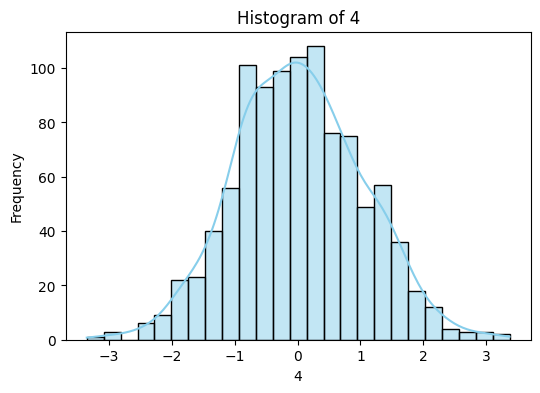

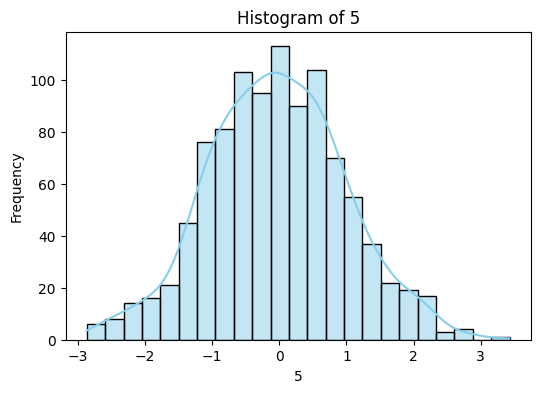

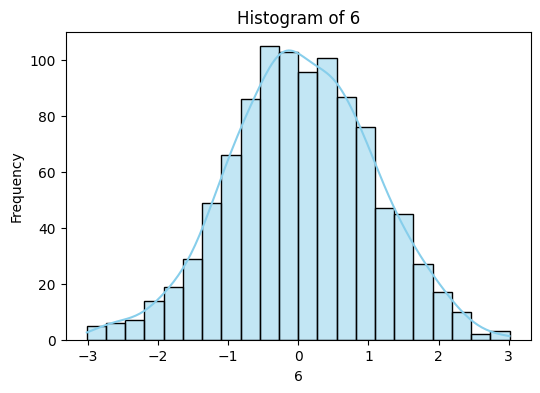

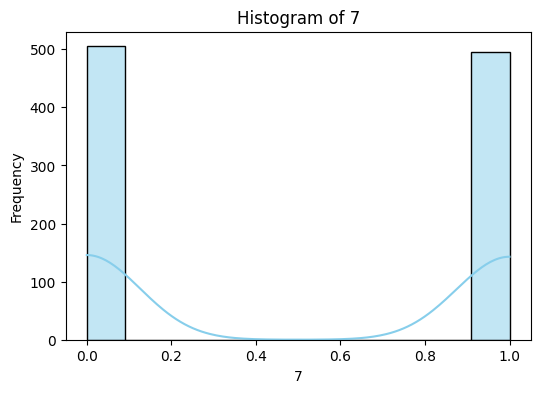

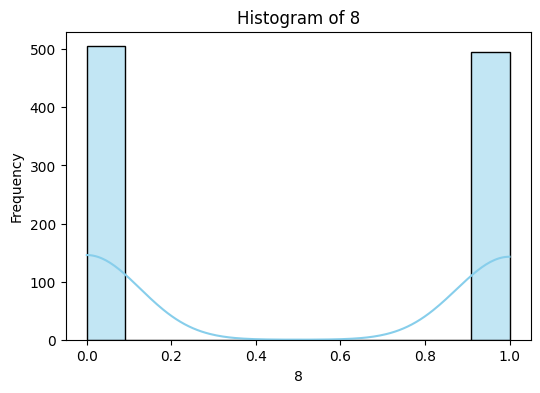

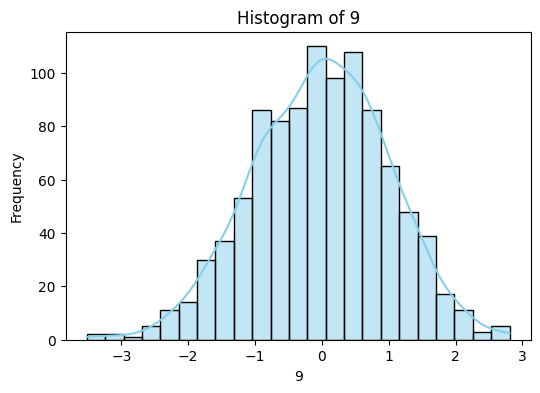

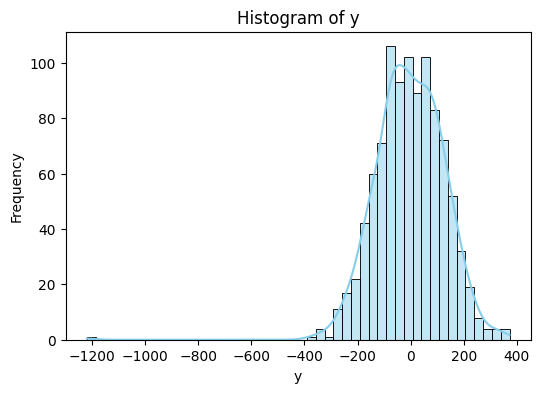

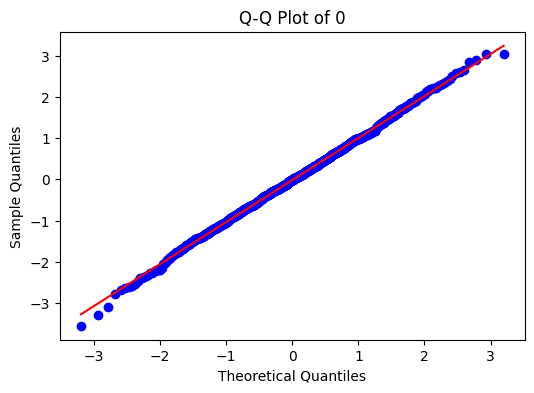

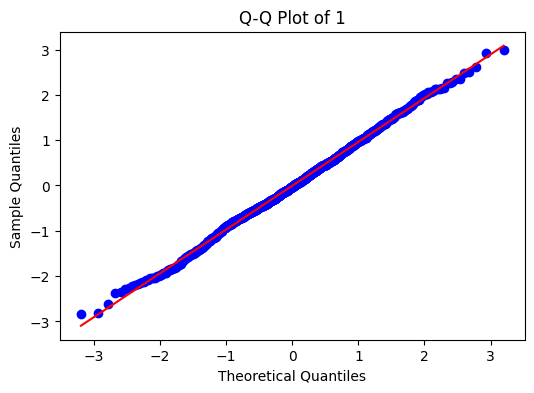

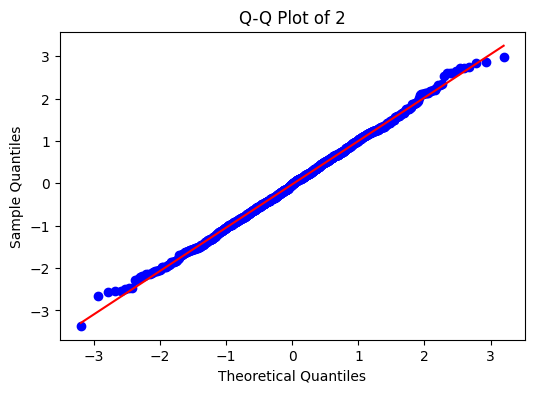

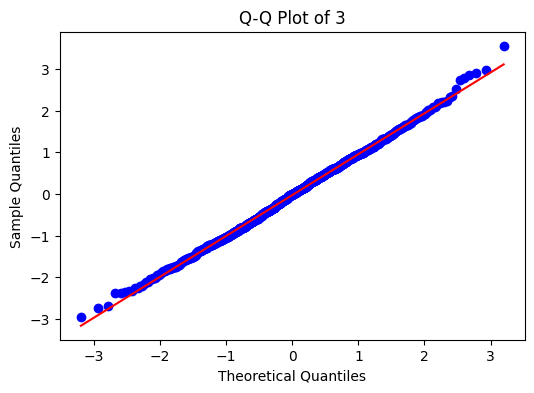

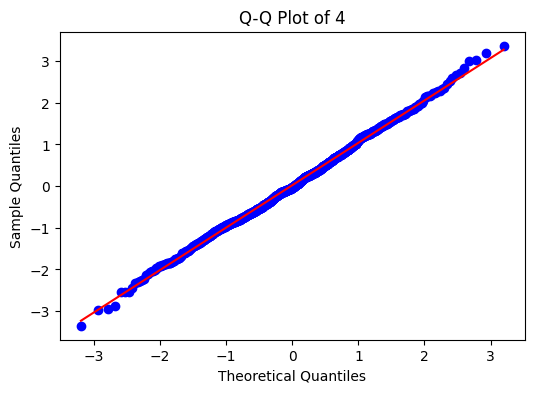

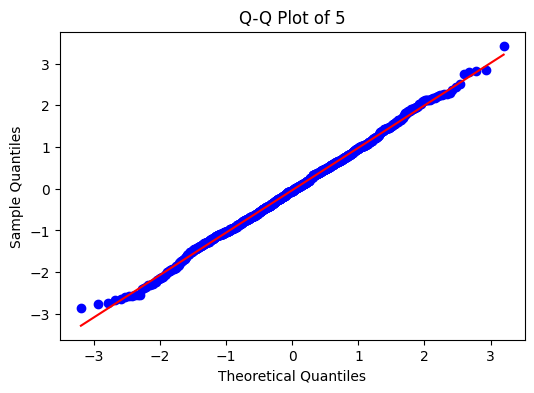

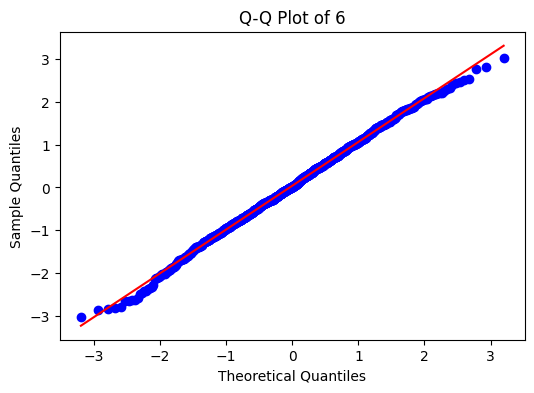

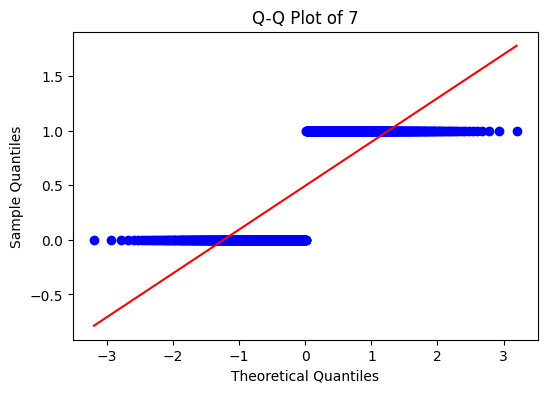

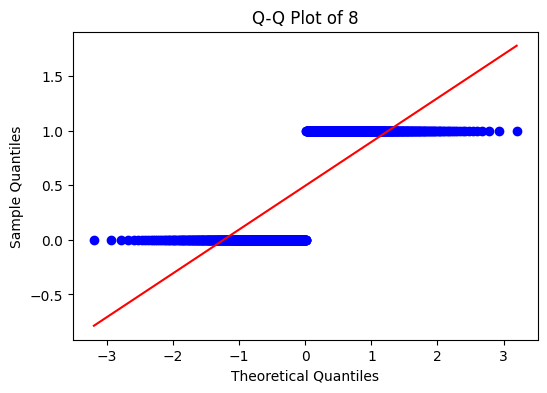

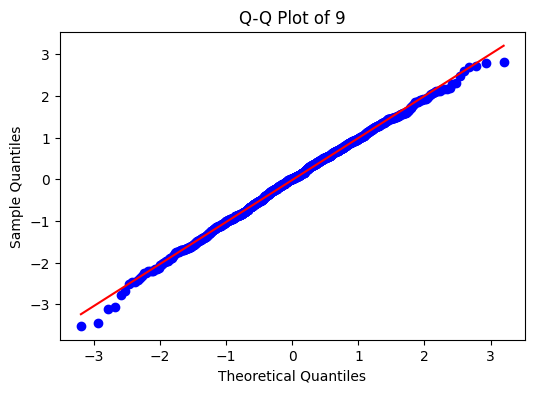

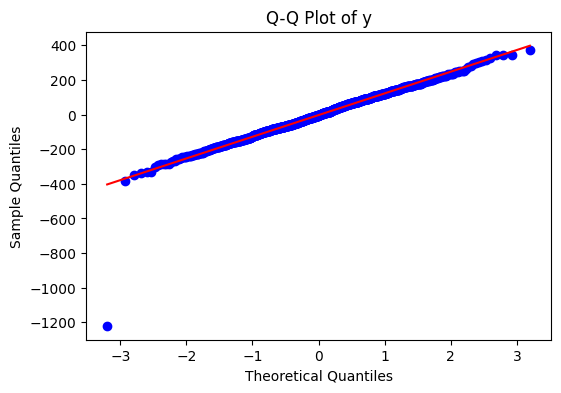

In [6]:
# Calculate skewness for each feature
skewness = df_tmp.drop('y', axis=1).apply(lambda x: skew(x))

# Plot skewness using a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

# Plot histograms for the features
for feature in df_tmp.columns:
    if feature != 'Target':
        plt.figure(figsize=(6, 4))
        sns.histplot(df_tmp[feature], kde=True, color='skyblue')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Optionally, create Q-Q plots for normality assessment
for feature in df_tmp.columns:
    if feature != 'Target':
        plt.figure(figsize=(6, 4))
        stats.probplot(df_tmp[feature], plot=plt)
        plt.title(f'Q-Q Plot of {feature}')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Sample Quantiles')
        plt.show()

## Fit model

In [7]:
model = make_pipeline(StandardScaler(), RidgeCV())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridgecv', RidgeCV())])

## Analyse correlations and model coefficients

In [8]:
correlations_r = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
correlations_p = [pearsonr(X[:, i], y)[1] for i in range(X.shape[1])]

In [9]:
df = pd.DataFrame({
        "coef": model["ridgecv"].coef_,
        "correlation r": correlations_r,
        "correlation p": correlations_p},
    index=[f"feature {i}" for i in range(X.shape[1])])
df

,coef,correlation r,correlation p
feature 0,-1.529528,-0.034627,2.739660e-01
feature 1,0.516905,0.009749,7.581588e-01
feature 2,59.958697,0.496610,2.160929e-63
feature 3,0.053120,0.049881,1.149366e-01
feature 4,68.390912,0.554580,1.019725e-81
feature 5,72.159892,0.577704,4.339895e-90
feature 6,-2.134884,-0.021040,5.063249e-01
feature 7,39.197821,-0.009722,7.588043e-01
feature 8,40.087218,0.024289,4.429447e-01
feature 9,1.915710,0.013164,6.775740e-01


In [10]:
# feature 7 and 8 are binary
np.unique(X[:,7]), np.unique(X[:,8])

(array([0., 1.]), array([0., 1.]))

In [11]:
# feature 7 and 8 are mutually exclusive
((X[:,7] == 1) & (X[:,8] == 1)).sum()

0

In [12]:
# feature 7 and 8 nearly cover the whole dataset!
((X[:,7] == 1) | (X[:,8] == 1)).sum() / X.shape[0]

0.99

## Tasks

Feature 7 and 8 seem to be important features for the model (with coefficients > 30!). However, taking a closer look, they are both binary, mutually exclusive, and nearly cover the whole dataset. Also they are barely correlated to the outcome by themselves. I would not expect them to both have such a high importance for the model and on top of that both positive! What is going on?

###Analysis

#### Section A

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
import pandas as pd
import scipy.stats as stats



# Calculate the Point-Biserial Correlation
point_biserial_corr_7, p_value_7 = stats.pointbiserialr(X[:, 7], y)
point_biserial_corr_8, p_value_8 = stats.pointbiserialr(X[:, 8], y)
# Print the Point-Biserial Correlation coefficient
print("Point-Biserial Correlation with outcome for feature 7:", point_biserial_corr_7)
print("P-value:", p_value_7)

print("Point-Biserial Correlation with outcome for feature 8:", point_biserial_corr_8)
print("P-value:", p_value_8)



Point-Biserial Correlation with outcome for feature 7: -0.009721743778694045
P-value: 0.7588043398937258
Point-Biserial Correlation with outcome for feature 8: 0.024288745633746216
P-value: 0.4429447125215523


          0         1         2         3         4         5         6  \
0  1.000000  0.034567  0.016569 -0.004387 -0.059086  0.000539 -0.031304   
1  0.034567  1.000000 -0.036778  0.041171 -0.006902  0.045086 -0.001083   
2  0.016569 -0.036778  1.000000 -0.041939  0.030432  0.016017  0.015505   
3 -0.004387  0.041171 -0.041939  1.000000  0.037971  0.082183 -0.121141   
4 -0.059086 -0.006902  0.030432  0.037971  1.000000 -0.001569  0.033907   
5  0.000539  0.045086  0.016017  0.082183 -0.001569  1.000000 -0.050887   
6 -0.031304 -0.001083  0.015505 -0.121141  0.033907 -0.050887  1.000000   
7 -0.028803  0.020149 -0.010930  0.008492  0.025118 -0.039493 -0.048114   
8  0.027669 -0.016297  0.002976 -0.009437 -0.023410  0.037344  0.043804   
9  0.034191  0.030711  0.015707  0.033590 -0.003748 -0.012270 -0.009830   

          7         8         9  
0 -0.028803  0.027669  0.034191  
1  0.020149 -0.016297  0.030711  
2 -0.010930  0.002976  0.015707  
3  0.008492 -0.009437  0.033590  
4  0

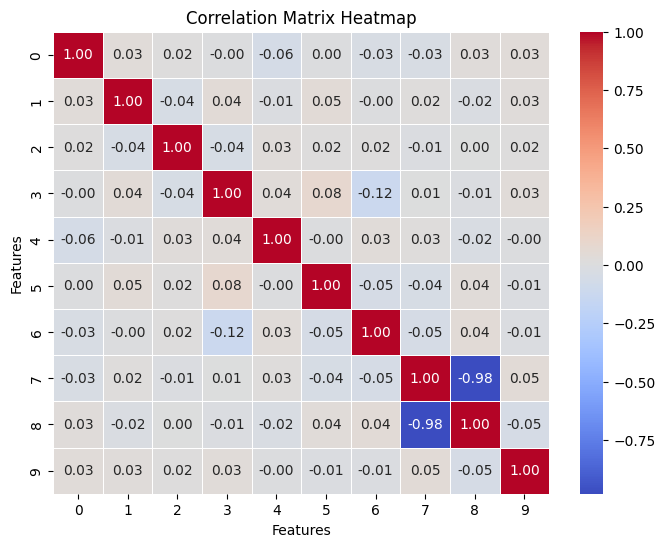

In [15]:
# Create a DataFrame from your dataset
df = pd.DataFrame(X)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set plot labels and title
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the heatmap
plt.show()



In [16]:
import pandas as pd


# Create a contingency table
contingency_table = pd.crosstab(X[:, 7], X[:, 8])


def calculate_phi_coefficient(observed_values):
    a = observed_values[0,0]  # Frequency of (1, 1)
    b = observed_values[0,1]  # Frequency of (1, 0)
    c = observed_values[1,0]  # Frequency of (0, 1)
    d = observed_values[1,1]  # Frequency of (0, 0)

    numerator = (a * d) - (b * c)
    denominator = ((a + b) * (c + d) * (a + c) * (b + d)) ** 0.5

    phi_coefficient = numerator / denominator

    return phi_coefficient
print('Phi Coefficient: ', calculate_phi_coefficient(contingency_table.values))

Phi Coefficient:  -0.9801980198019802


In [17]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.015765,-0.004966,-0.023935,-0.026095,0.022330,-0.034920,0.040668,0.495000,0.495000,-0.016560
std,1.019578,0.964478,1.020821,0.979192,1.015574,1.014593,1.020355,0.500225,0.500225,1.006448
min,-3.558701,-2.836588,-3.361143,-2.944024,-3.349124,-2.864359,-3.016230,0.000000,0.000000,-3.515245
25%,-0.686756,-0.620379,-0.723479,-0.728159,-0.683312,-0.733184,-0.640638,0.000000,0.000000,-0.725976
50%,-0.010570,-0.023874,-0.011093,-0.010462,-0.026620,-0.047411,0.012685,0.000000,0.000000,0.016177
75%,0.659678,0.619708,0.664372,0.629650,0.700856,0.635784,0.735588,1.000000,1.000000,0.683117
max,3.054827,2.990061,2.974039,3.557887,3.369351,3.427600,3.011587,1.000000,1.000000,2.805900


In [20]:
def print_rows_when_features_equal(data, feature_index1, feature_index2):
    for row in data:
        if row[feature_index1] == row[feature_index2]:
            print(row[feature_index1], row[feature_index2], row[-1])

In [30]:
data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
data_df = pd.DataFrame(data)
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.015765,-0.004966,-0.023935,-0.026095,0.022330,-0.034920,0.040668,0.495000,0.495000,-0.016560,-2.800014
std,1.019578,0.964478,1.020821,0.979192,1.015574,1.014593,1.020355,0.500225,0.500225,1.006448,127.803318
min,-3.558701,-2.836588,-3.361143,-2.944024,-3.349124,-2.864359,-3.016230,0.000000,0.000000,-3.515245,-1220.021214
25%,-0.686756,-0.620379,-0.723479,-0.728159,-0.683312,-0.733184,-0.640638,0.000000,0.000000,-0.725976,-81.949122
50%,-0.010570,-0.023874,-0.011093,-0.010462,-0.026620,-0.047411,0.012685,0.000000,0.000000,0.016177,-3.613078
75%,0.659678,0.619708,0.664372,0.629650,0.700856,0.635784,0.735588,1.000000,1.000000,0.683117,86.176166
max,3.054827,2.990061,2.974039,3.557887,3.369351,3.427600,3.011587,1.000000,1.000000,2.805900,372.652785


In [23]:
print (y.mean())

-2.800014463632955


In [24]:
print("Rows where feature values are equal:")
print_rows_when_features_equal(data, 7, 8)

Rows where feature values are equal:
0.0 0.0 126.92975399970399
0.0 0.0 221.45128940428646
0.0 0.0 -43.59229992751973
0.0 0.0 -1220.0212137613562
0.0 0.0 -84.26930587231779
0.0 0.0 -13.429685316299107
0.0 0.0 -229.90733601316563
0.0 0.0 82.68461214627011
0.0 0.0 23.230841404935646
0.0 0.0 178.57968144715952


#### Section B

In [16]:
X = df_tmp.drop([7 , 'y'], axis=1)

In [17]:
y = df_tmp['y']

In [18]:
X = X.to_numpy()
y = y.to_numpy()

In [19]:
model = make_pipeline(StandardScaler(), RidgeCV())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridgecv', RidgeCV())])

In [20]:
correlations_r = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
correlations_p = [pearsonr(X[:, i], y)[1] for i in range(X.shape[1])]

In [21]:
point_biserial_corr_8, p_value_8 = stats.pointbiserialr(X[:, 7], y)
# Print the Point-Biserial Correlation coefficient
print("Point-Biserial Correlation with outcome for feature 8:", point_biserial_corr_8)
print("P-value:", p_value_8)

Point-Biserial Correlation with outcome for feature 8: 0.024288745633746216
P-value: 0.4429447125215523


In [22]:
df = pd.DataFrame({
        "coef": model["ridgecv"].coef_,
        "correlation r": correlations_r,
        "correlation p": correlations_p},
    index=[f"feature {i}" for i in range(X.shape[1])])
df

,coef,correlation r,correlation p
feature 0,-1.599162,-0.034627,2.739660e-01
feature 1,0.685972,0.009749,7.581588e-01
feature 2,60.157663,0.496610,2.160929e-63
feature 3,-0.073969,0.049881,1.149366e-01
feature 4,69.106234,0.554580,1.019725e-81
feature 5,72.668802,0.577704,4.339895e-90
feature 6,-2.392948,-0.021040,5.063249e-01
feature 7,2.080188,0.024289,4.429447e-01
feature 8,1.996933,0.013164,6.775740e-01


### Answer

Generally speaking coefficients are not the best way to figure out how important a feature is in a model. This is because they depend on the scale of the input features. For example, if we measure the age of a home in minutes instead of years, the coefficient for the age feature becomes really small, even though the number of years isn't more important than the number of minutes. So, a coefficient's size doesn't always show how important a feature is in a model. In this task, the situation where binary features with high coefficients are mutually exclusive and nearly cover the whole dataset, but individually have low correlation with the outcome, can be explained by the presence of multicollinearity in the dataset.

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. When multicollinearity is present, it can be challenging for the model to distinguish the individual effects of these correlated features on the outcome variable.

In this specific case, we have binary features labeled as 7 and 8, and they are mutually exclusive, implying they are likely highly correlated. When we say they "nearly cover the whole dataset," it suggests that most data points fall into one of these two categories, leaving little room for other features to contribute substantially to the model's predictions. This can lead to inflated coefficients for both features as the model tries to allocate importance between them.

The positive coefficients for both features could be a result of how the model handles collinearity. Depending on the regression algorithm used, it may distribute importance between correlated features by assigning positive coefficients to both, even if individually they have a weak correlation with the outcome.

The initial point to take into account is that the Pearson correlation is designed for assessing the correlation between two continuous variables. Therefore, the correlations provided may not be deemed reliable. In order to tackle this concern, I employ a specialized variant of the Pearson correlation coefficient specifically suited for one binary variable and one continuous variable, known as the Point-Biserial Correlation. This code is presented in subsection A of my analysis section. Notably, the outcomes align entirely with those of the Pearson correlation in this specific case.

Here are the interpretation of the correlation coefficients and p-values:

For Feature 7:
- Correlation coefficient (r) = -0.009722
- p-value (correlation p) = 7.588043e-01 (0.7588)

For Feature 8:
- Correlation coefficient (r) = 0.024289
- p-value (correlation p) = 4.429447e-01 (0.4429)

The correlation coefficients are close to zero, indicating weak linear relationships between these features and the outcome variable. The high p-values suggest that these correlations are not statistically significant, implying that any observed correlations could be due to random chance rather than a true relationship.

Given these results, it's reasonable to conclude that Features 7 and 8 do not have a substantial linear relationship with the outcome variable. This supports the idea that multicollinearity between Features 7 and 8 might be influencing the model's behavior, as they are highly correlated with each other but not strongly correlated with the outcome.

To assess whether multicollinearity exists between Features 7 and 8, we can visualize the correlation matrix as a heatmap. In section A of our analysis, we observe a high negative correlation (-0.98) between these two features (Feature 7 and Feature 8), indicating that when one feature increases, the other tends to decrease almost perfectly. This strong negative correlation between the two features can create a multicollinearity. Previously, it was noted that Pearson correlation is not ideal for analyzing binary variables. However, upon closer examination of the data, it became evident that using ".corr" in this specific case yielded a valid result. To further validate this, I calculated the Phi Coefficient, which returned the same value (-0.98). This exceptionally strong negative association between these two binary features is a clear indication of multicollinearity. Such a high level of negative correlation among binary features can present challenges in regression analysis. It complicates the model's ability to differentiate the unique contributions of each binary feature to the outcome, as they essentially convey the same information. Multicollinearity can have several effects on a regression model, one of which is "Instability of Coefficient Estimates". Instability of Coefficient Estimates means that small changes in the dataset or the inclusion/exclusion of other features can lead to unstable coefficient estimates. This implies that the coefficients for Feature 7 and Feature 8 may vary significantly depending on the data or model specification.

When working with highly correlated binary features, the primary concern is the potential for redundancy in the information they provide to the model. The high association between binary features can affect the model's interpretability and, in some cases, its performance. So when we say multicollinearity, our main purpose is to show situation where two or more features are closely related to one another.


In the final cell of Section A, an experiment was conducted. It is noteworthy that in 99 percent of instances, features 7 and 8 exhibit dissimilarity. However, within the remaining 1 percent, outliers emerge. It is conceivable that the elevated coefficient may be attributed to the model's attempt to accommodate and predict these outlier cases.


To address this issue and gain a better understanding of the impact of these features on the outcome, we can employ feature selection techniques to decide whether both Feature 7 and Feature 8 are needed in our model. Given the absence of domain knowledge and specific analysis goals, we can make a random choice, such as keeping Feature 8 and discarding Feature 7. When we re-evaluate the correlation with the output in section B of our analysis, we observe that the coefficient of Feature 8 (which is now labeled as feature 7) is no longer high.


In conclusion, the identified issue stems from multicollinearity between Feature 7 and Feature 8, compounded by outliers in instances where both features share equal values. Although robust negative correlations typically signal multicollinearity, the subtle association between these features and the outcome variable underscores the need to mitigate multicollinearity for the model to yield meaningful and interpretable predictions. To further enhance model performance, another recommended approach involves the exclusion of outliers. This step aims to refine coefficient evaluations and foster a more accurate representation of the underlying relationships within the data.